In [111]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,FloatSlider

In [112]:
def S_wb(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

In [113]:
S_wb(1, 0.5 ,0)

np.float64(0.6224593312018546)

In [114]:
w =0.9
b =0.1
x = np.linspace(-10, 10,100)
y = S_wb(x, w, b)

In [115]:
type(y)

numpy.ndarray

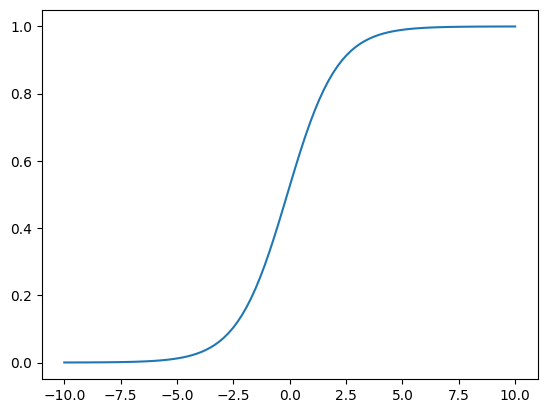

In [116]:
plt.plot(x, y)
plt.show()

interactive(children=(FloatSlider(value=0.9, description='w', max=2.0, min=-2.0), FloatSlider(value=0.9, descr…

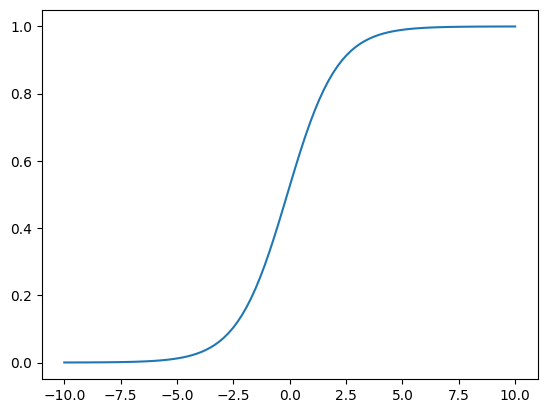

In [117]:
@interact(w=FloatSlider(min=-2, max=2, step=0.1, value=0.9),
          b=FloatSlider(min=-2, max=2, step=0.1, value=0.9))
def plot_sigmoid(w, b):
    x = np.linspace(-10, 10,100)
y = S_wb(x, w, b)
plt.plot(x, y)
plt.show()

In [118]:
def S_w1w2b(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [119]:
S_w1w2b(1,2,0.5,0,0)

np.float64(0.6224593312018546)

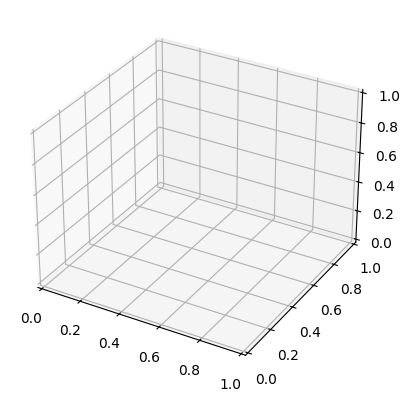

In [120]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()

In [147]:
import matplotlib.pyplot as plt


In [122]:
X1 = np.linspace(-10, 10,100)
X2 = np.linspace(-10, 10,100)
XX1, XX2 = np.meshgrid(x1, x2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [123]:
w1 = 2
w2 = -0.5
b = 0
Y = S_w1w2b(XX1, XX2, w1, w2, b)

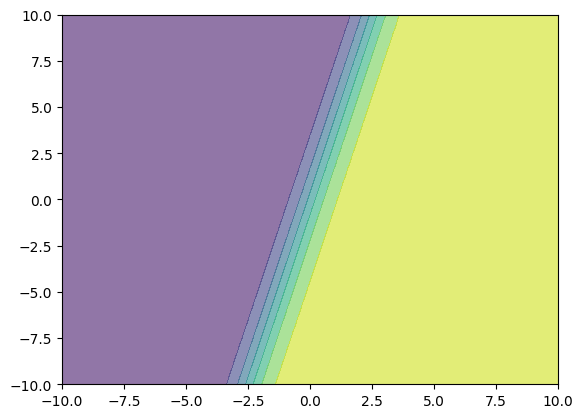

In [124]:
plt.contourf(XX1, XX2, Y,alpha=0.6)
plt.show()

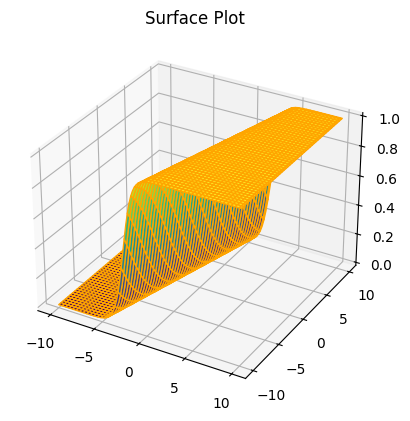

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='orange')
ax.set_title('Surface Plot')
plt.show()

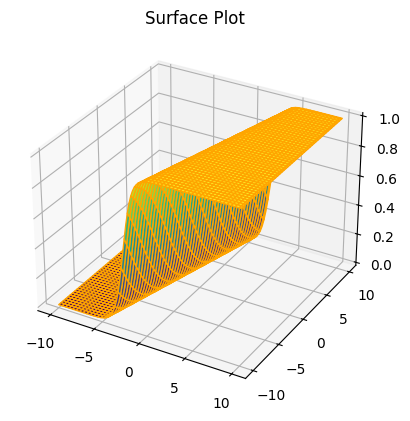

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='orange')
ax.set_title('Surface Plot')
plt.show()

ax.view_init(30,0)

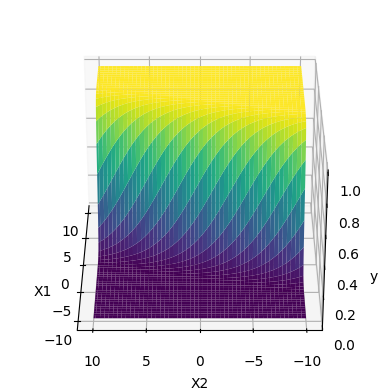

In [127]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.view_init(30,180)

PLOTTING LOSS

In [128]:
w_unknown=0.5
b_unknown=0.25

x=np.random.random(25)*20-10
y=S_wb(x,w_unknown,b_unknown)

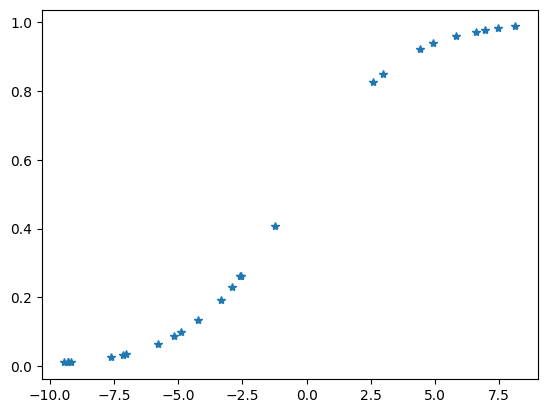

In [129]:
plt.plot(x,y,'*')
plt.show()

In [130]:
def calculate_loss(x, y, w_est, b_est):
    loss = 0
    for x,y in zip(x,y):
        loss += (y - S_wb(x, w_est, b_est))**2
    return loss
            

In [131]:
w=np.linspace(0,2,100)
b=np.linspace(-1,1,100)
ww, bb = np.meshgrid(w,b)
loss = np.zeros(ww.shape)

In [132]:
ww.shape, bb.shape

((100, 100), (100, 100))

In [133]:
for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        loss[i,j] =calculate_loss(x,y,ww[i,j],bb[i,j])

Text(0.5, 0, 'loss')

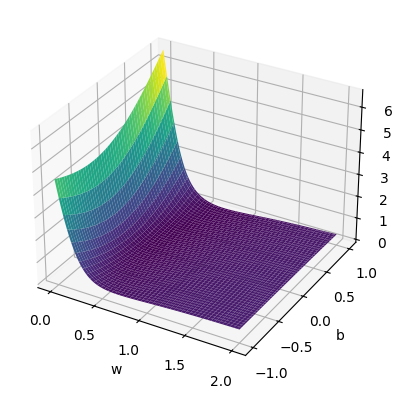

In [134]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
#ax.view_init(30,180)

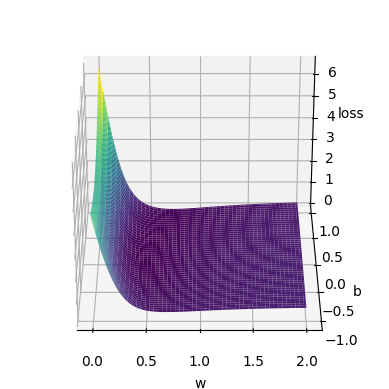

In [135]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30,270)

In [136]:
np.argmin(loss)

np.int64(6225)

In [137]:
ij=np.argmin(loss)
i=np.floor(ij/loss.shape[1])
j=ij-i*loss.shape[1]

In [138]:
print(i,j)

62.0 25.0


In [139]:
ij=np.argmin(loss)
i=int(np.floor(ij/loss.shape[1]))
j=int(ij-i*loss.shape[1])

In [140]:
print(i,j)

62 25


In [141]:
print(ww[i,j],bb[i,j])

0.5050505050505051 0.2525252525252526


CLASS FOR SIGMOID NEUTRON

In [142]:
class sigmoid_neuron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self, x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self, x, y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b(self, x, y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    def fit(self, X, Y, epochs=1,learning_rate=1,initialize=True):
        # Initialize w, b
        self.w = np.random.randn(X.shape[1])
        self.b = 0
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw 
            self.b-=learning_rate*db

FOR TOY DATA

In [143]:
x =np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
y=[1,1,1,0,0,0]

In [144]:
sn = sigmoid_neuron()
sn.fit(x,y,1,0.25,True)

In [145]:
def plot_sn(x,y, sn):
    x1 = np.linspace(-10,10,100)
    x2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(x1, x2)
    yy =np.zeros(XX1.shape)
    for i in range(x2.size):
        for j in range(x1.size):
            val = np,asarray([x1[j], x2[i]])
            yy[i,j] = sn.sigmoid(sn.perceptron(val))
        plt.contourf(XX1, XX2, yy,cmap='viridis', alpha=0.6)
    plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', edgecolors='k')
    plt.plot()

In [152]:
sn.fit(x,y,1,0.25,True)
for i in range(10):
    sn.fit(x,y,1,0.25,False)
    print(sn.w, sn.b)



[0.64779157 1.45093378] 0.008959129784993206
[0.65710494 2.18671033] 0.029464437916648826
[-0.13135398 -2.03838941] 0.008676031500989096
[ 0.22756595 -0.05138858] -0.022169228592149242
[0.42414368 0.68170452] 0.0022378125481786353
[-0.14576655 -1.07386609] 0.03831434746288377
[-0.54855812 -0.80181175] 0.031993269913402206
[-0.91072573  0.88349168] -0.00022589033031830599
[-0.40250339 -0.26438628] 0.05708264903313381
[-1.2268301  -0.61684427] 0.01819204648789252


[ 1.47573539 -0.47025863] -0.05647036561178548


[]

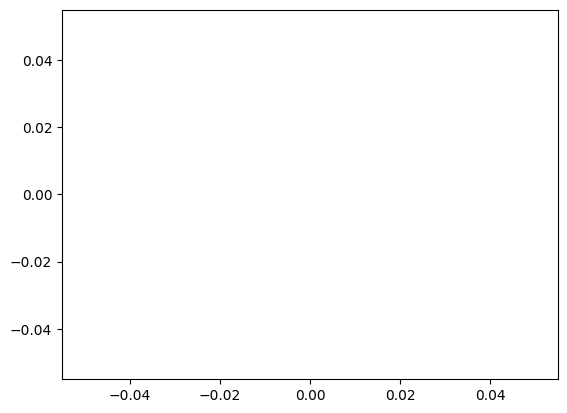

In [156]:
sn.fit(x,y,1,0.25,True)
for i in range(10):
    sn.fit(x,y,1,0.25,False)
print(sn.w, sn.b)
plt.plot()